# Chapter 2 - Distributions

One of the best ways to describe a variable, is knowing it's distribution.
The most common way to do this is by a histogram, which is a graph that shows the frequency of each value.
    - Frequency on a histogram refers to how much (frequently) does every value appears on the plot. 
    
In python --- Efficience ---> Dictionaries. Given a sequence of values *t*:

                    hist = {}
                    for x in t:
                    hist[x] = hist.get(x, 0) + 1
                    
That translates into a dictionary that maps from values to frequencies. Alternative:

                    from collections import Counter
                    counter = Counter(t)

Counter object -> subclass of dictionary.

Another alternative is using *value_counts()*.

In [33]:
t = [1, 2, 2, 3, 5]

In [34]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 2, 3: 1, 5: 1})

In [2]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first

# Representing Histograms

The Hist constructor (from *thinkstats*) can use:
- Sequences
- Dictionaries
- Pandas Series
- Other hists

Creating hist objects is as easy as:

In [3]:
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5])
hist

Hist({1: 1, 2: 2, 3: 1, 4: 7, 5: 1})

In [36]:
#Hist objects -> Freq -> frequency(value)
hist.Freq(4)

7

In [37]:
#Freq = []
hist[4]

7

In [38]:
#If not value in hist:
    #value frequency = 0
hist.Freq(6)

0

In [39]:
#Values -> ([Dict_keys])
hist.Values()

dict_keys([1, 2, 3, 4, 5])

In [40]:
#To values.sort.loop --- use ---> sorted
for val in sorted(hist.Values()):
    print(val, hist.Freq(val))

1 1
2 2
3 1
4 7
5 1


In [41]:
#Or Items to iterate through value-frequency pairs
for val, freq in hist.Items():
    print(val, freq)    

1 1
2 2
3 1
4 7
5 1


# Plotting Hists
To plot hist with thinkplot <-(thinkstats2.module), try this:

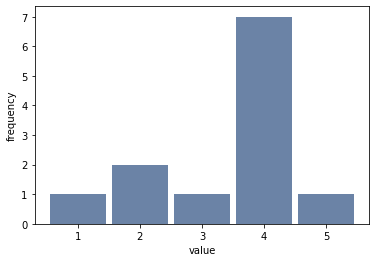

<Figure size 576x432 with 0 Axes>

In [4]:
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='value', ylabel='frequency')

[thinkplot Documentation](http://greenteapress.com/thinkstats2/thinkplot.html)

# NSFG variables
When you are just starting to work with a dataset, I suggest you to **explore the variables you are planning to use one at a time.** A good way to start is by looking at hists.

In [43]:
#Let's start by:
import nsfg
preg = nsfg.ReadFemPreg()        #<- Read the data
live = preg[preg.outcome==1]    #<- Select records for live births

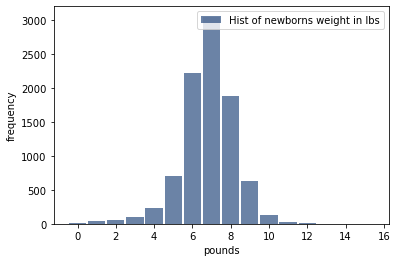

<Figure size 576x432 with 0 Axes>

In [44]:
#Next, hist of birthwgt_lb for live births
#My plot
hist = thinkstats2.Hist(live.birthwgt_lb, label = 'Hist of newborns weight in lbs')
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'pounds', ylabel = 'frequency')

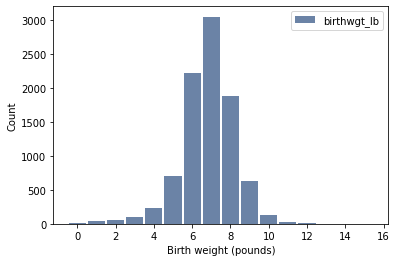

In [6]:
#Book creator's plot:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

**Bell-shape/gausian (normal) distribution, of mode 7. a little bit gravitated towards the left (asymmetric) so not exactly a true normal distribution**

In [45]:
#When Hist(pandas) -> NaN values = dropped
#label = str in legend

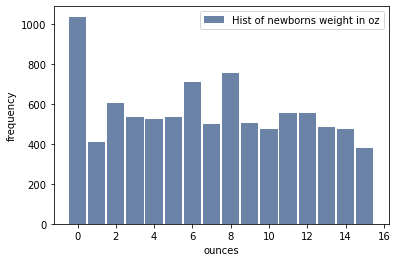

<Figure size 576x432 with 0 Axes>

In [46]:
hist = thinkstats2.Hist(live.birthwgt_oz, label = 'Hist of newborns weight in oz')
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'ounces', ylabel = 'frequency')

**In theory --- we expect --- uniform distribution = All values == frequency. But here 0, 1 and 15 present the opposite of uniformity.  probably because respondents round off birth weights that are close to an
integer value.**

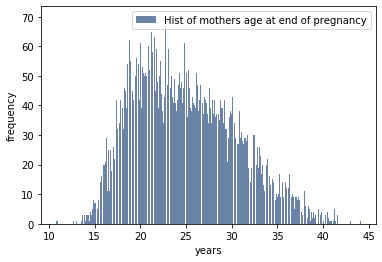

<Figure size 576x432 with 0 Axes>

In [60]:
#My code:
hist = thinkstats2.Hist(live.agepreg, label = 'Hist of mothers age at end of pregnancy')
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'years', ylabel = 'frequency')

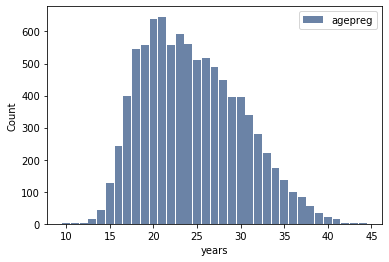

In [8]:
#Creators code:
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

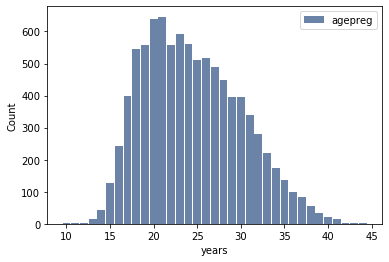

In [61]:
#Book writter's code:
ages = np.floor(live.agepreg)
hist = thinkstats2.Hist(ages, label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

**Another pseudo-bell shaped distribution, this time more gravitated to the right. Mode = 21, most mothers in their 20's less in their 30' and a lot less in other ages.**

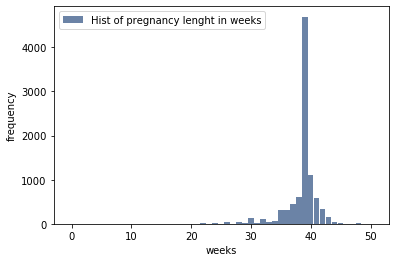

<Figure size 576x432 with 0 Axes>

In [48]:
hist = thinkstats2.Hist(live.prglngth, label = 'Hist of pregnancy lenght in weeks')
thinkplot.Hist(hist)
thinkplot.Show(xlabel = 'weeks', ylabel = 'frequency')

**By far the most common value is 39 weeks. The left tail is longer than the right; early babies are common, but pregnancies seldom go past 43 weeks, and doctors often intervene if they do.**

# Outliers
Histograms are good for identifying the shape and frequency of the values. But outliers are hardly visible. 
**Outliers** are extreme values that might be errors in measurement and recording, or might be accurate reports of rare events. 

In [49]:
#Hist.Largest/Smallest takes an integer *n* and returns the *n* largest or smallest values form the hist:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0 1
4 1
9 1
13 1
17 2
18 1
19 1
20 1
21 2
22 7


In [50]:
for weeks, freq in hist.Largest(10):
    print(weeks, freq)

50 2
48 7
47 1
46 1
45 10
44 46
43 148
42 328
41 587
40 1116


These are the values of pregnancy lenght. Let's apply logic:
- Values below 10 weeks are certainly errors.
- Values over 30 weeks are probably legit.
- Between 10-30 is hard to be sure, some may be errors but some represent premature babies.
- Most doctors recommend inducter labor if pregnancy > 42 weeks, This is why some of the largest values are surprising. 50 weeks seems medically unlikely.

What we've just done is a proof of the fact that the best way of handling outliers is **domain knowledge.** Not only your knowledge of the field, but even to know where the data come from, and of course what they mean.

The influence of outliers also may depend on what analysis you are planning to perform. In our case, the motivating question is whether first babies tend to be earlier or late. If we ask this we should be interested in full-term pregnancies, so for this analysis we will focus on pregnancies longer than 27 weeks.

# First Babies

<Figure size 432x288 with 0 Axes>

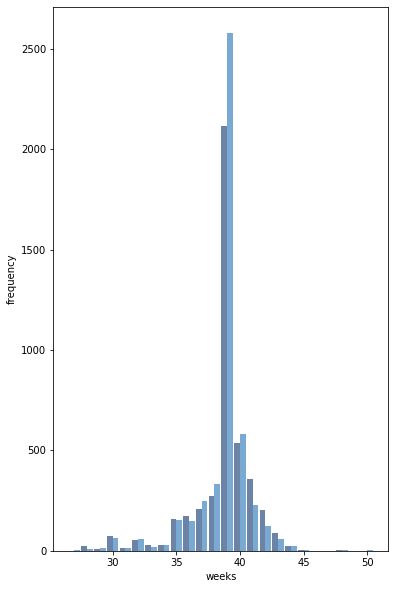

<Figure size 576x432 with 0 Axes>

In [10]:
#Let's divide the DataFrame to compare the distribution of pregnancy lenght between first babies and others.
first = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(first.prglngth[first.prglngth>=27])
others_hist = thinkstats2.Hist(others.prglngth[others.prglngth>=27])


#Now let's plot both histograms on the same axis:
#My terrible plot, (I was trying to normalize the plot size but couldn't xD): 
width = 0.45
thinkplot.PrePlot(2)
thinkplot.figure(figsize=(6, 10))
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(others_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency')

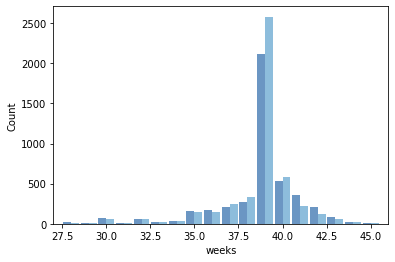

In [12]:
#Author's plot:
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(others_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

# Summarizing Distributions
Hist = description of the distribution of a sample --> we could reconstruct the values in a saple (although not their order).

If details of distribution = important -> hist. But often, we want to summarize the distribution with a few descriptive stats. Some might be:
- **central tendency:** Do the values tend to **cluster** around a particular point?
- **modes:** Is there more than one cluster?
- **spread:** How much variability is there in the values?
- **tails:** How quickly do probabilites drop off as we move away from the modes?
- **outliers:** Are there extreme values far from the modes?

The statistics that are designe to answer these questions are called **summary statistics.** By far the most common is the mean, but not because it works on everything, because it certaintly doesn't. 

**mean** = sum of values/nº of values

Distinction between **mean** and **average:**
* The mean of a sample is the summary statistic computed with the previous formula
* An average is one of several (so is a famaly of stats) summary statistics used to describe a central tendency. You choose the appropiate one for the sample.

If I have 6 apples the mean may be a good choice, because the size and weight is pretty much the same. BUT if I have 6 pumpkins,3 smalls, two medians, and one giant. The mean may nor work at all.

# Variance
If the mean doesn't summarizes the pumpkins weights well, we can do better with two numbers: mean and **variance.**

The variance is another summary stat intended to describe the **spread** of a distribution.
* Variance = mean.sqrtdeviation

In [52]:
mean = live.prglngth.mean()
var = live.prglngth.var()
std = live.prglngth.std() 

In [53]:
mean

38.56055968517709

In [54]:
var

7.302662067826817

In [55]:
std

2.702343810070587

For all live births, the mean pregnancy length is 38.6 weeks, the standard deviation is 2.7 weeks, which means we should expect deviations of 2-3 weeks to be common. Variance of pregnancy length is 7.3, which is hard to interpret, especially since the units are weeks2, or “square weeks.” Variance is useful in some calculations, but it is not a good summary statistic. 

# Effect Size
Effect siez is literally what it's name says. To describe the difference between two groups, one obvious choice is the difference in the means. Mean pregnancy length for first babies is 38.601; for other babies it is 38.523. The difference is 0.078 weeks, which works out to 13 hours. As a fraction of the typical pregnancy length, this difference is about 0.2%.

Another way to convey the size of the effect is to compare the difference between groups to the variability within groups. Cohen’s d is a statistic intended to do that; it is defined:

    d = (x1 - x2)/s 

where x1 and x2 are the means of the groups and s is the “pooled standard deviation”.

In [56]:
#Here’s the Python code that computes Cohen’s d
def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    import math
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

In [57]:
CohenEffectSize(first.prglngth, others.prglngth)

0.028879044654449834

In this example, the difference in means is 0.029 standard deviations, which is small. To put that in perspective, the difference in height between men and women is about 1.7 standard deviations.

# Reporting Results
Now, how should we report the results of the differences found (if it's relevant)?

The answer depends on who is asking the question:
* A scientist might be interested in any (real) effect, no matter how small.
* A doctor might only care about effects that are clinically significant; that is, differences that affect treatment decisions. 
* A pregnant woman might be interested in results that are relevant to her, like the probability of delivering early or late. 
* It also depends on **your goals:**
  - If you are trying to demonstrate the importance of an effect, you might choose summary statistics that emphasize differences.
  - If you are trying to reassure a patient, you might choose statistics that put the differences in context. 
* **Everything being guided with professional ethics, objetivity and honesty. Always seek the truth.**